# 2차원 랜덤워크 (술 취한 사람의 움직이는 궤적)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import randint
import seaborn as sns

# 상황1 - 동서남북

In [30]:
N = 5000
T = 1000 

plt.figure()

a=[]
b=[]
distance=[]
walk=[]
w=[]
q=[]

case=[1,2,3,4]
for i in range(N):
    position = np.zeros((2, T+1))
    for t in range(1, T+1):
        way = np.random.choice(case,1,p=[0.25,0.25,0.25,0.25])
        if way==1 :                                   #way=1 east
            position[0][t] = position[0][t-1] + 1
            position[1][t] = position[1][t-1] + 0  
        elif way==2:                                  #way=2 west
            position[0][t] = position[0][t-1] - 1
            position[1][t] = position[1][t-1] + 0  
        elif way==3: 
            position[0][t] = position[0][t-1] + 0     #way=3 south
            position[1][t] = position[1][t-1] - 1         
        else : 
            position[0][t] = position[0][t-1] + 0     #way=4 north
            position[1][t] = position[1][t-1] + 1  
#움직인 거리
        x=np.cumsum(position[0][t])
        y=np.cumsum(position[1][t])
        walk.append((x**2+y**2)**0.5)

#궤적 그리기
    a.append(position[0])
    b.append(position[1])


    
#최종 위치
    x_position=x[-1]
    y_position=y[-1]
    distance.append((x_position**2+y_position**2)**0.5)

#최소 시점
w=np.array(walk)
w.shape=(5000,1000)
w.shape
hit=(np.abs(w)>40).any(1)
q.append((np.abs(w[hit]) > 40).argmax(1))   

<Figure size 432x288 with 0 Axes>

## 질문 1-1 궤적을 그리시오

4524
509
1239
4156
561


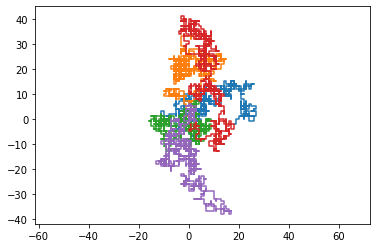

In [31]:
for j in range(5):
    z=randint(1,5000)
    plt.plot(a[z],b[z])
    plt.axis('equal')
    print(z)

## 질문 1-2  최종 위치와 원점 사이의 거리
### numerical summary, 히스토그램, 바이올린그림, 커널밀도추정량

In [32]:
pd.DataFrame(distance).describe()

,0
count,5000.000000
mean,27.968763
std,14.494314
min,0.000000
25%,17.029386
50%,26.076810
75%,37.141604
max,82.764727


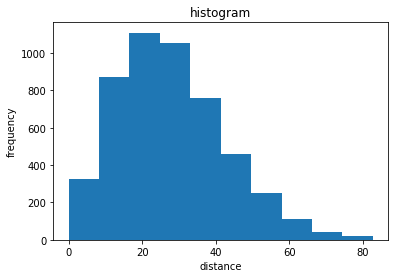

In [33]:
plt.hist(distance)
plt.title("histogram")
plt.xlabel("distance")
plt.ylabel("frequency")
plt.show()

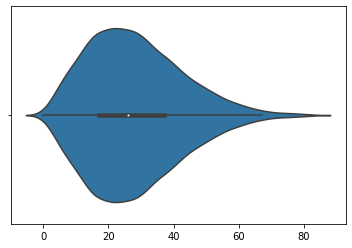

In [34]:
sns.violinplot(distance)

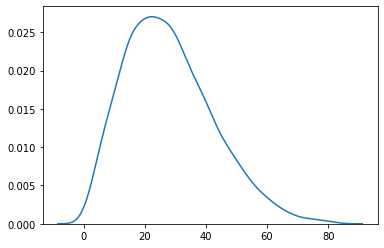

In [35]:
sns.kdeplot(distance)

## 질문 1-3 원점에서 가장 먼거리

In [36]:
max(distance)

82.76472678623425

## 질문 1-4 원점에서 가장 까까운 거리

In [37]:
min(distance)

0.0

## 질문 1-5 원점에서 반경 40을 벗어나는 최소 시점
### numerical summary, 히스토그램, 바이올린그림, 커널밀도추정량

In [38]:
pd.DataFrame(q).T.describe()

,0
count,1712.000000
mean,671.484813
std,198.405667
min,149.000000
25%,518.000000
50%,688.500000
75%,834.000000
max,999.000000


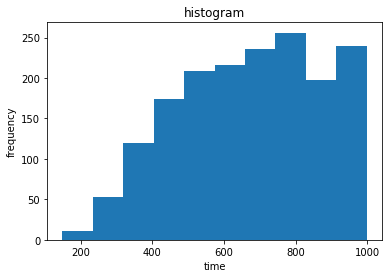

In [39]:
plt.hist(q)
plt.title("histogram")
plt.xlabel("time")
plt.ylabel("frequency")
plt.show()

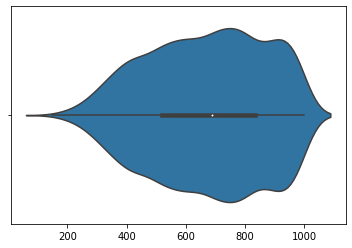

In [40]:
sns.violinplot(q)

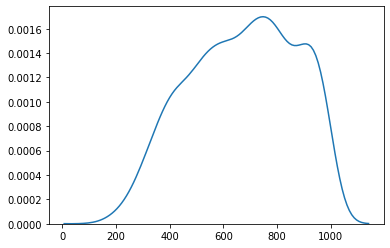

In [41]:
sns.distplot(q, hist=False, kde=True)

# 상황2 - 모든 방향 

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint

N = 5000  # number of random walkers
T = 1000  # time span
 
plt.figure() #공간생성(크기 지정은 안한것)

a=[]
b=[]
distance=[]
walk=[]
w=[]
q=[]


for i in range(N):
    position = np.zeros((2, T+1))    #영행렬 생성
    for t in range(1, T+1):
        angle = np.random.random()*2*np.pi #np.random.random():0, 1의 범위에서 균등 분포   로 추출한 값들로 채워진 ndarray를 반환    
        position[0][t] = position[0][t-1] + np.cos(angle)   #x좌표 결정
        position[1][t] = position[1][t-1] + np.sin(angle)     #y좌표 결정  
    
#움직인 거리    
        x=np.cumsum(position[0][t])
        y=np.cumsum(position[1][t])
        walk.append((x**2+y**2)**0.5)
#궤적 그리기
    a.append(position[0])
    b.append(position[1])
#최종 위치
    x_position=x[-1]
    y_position=y[-1]
    distance.append((x_position**2+y_position**2)**0.5)
#최소 시점
w=np.array(walk)
w.shape=(5000,1000)

hit=(np.abs(w) > 40).any(1)

q.append((np.abs(w[hit]) > 40).argmax(1))


<Figure size 432x288 with 0 Axes>

## 질문 2-1 궤적을 그리시오

2307
4647
4759
2796
1883


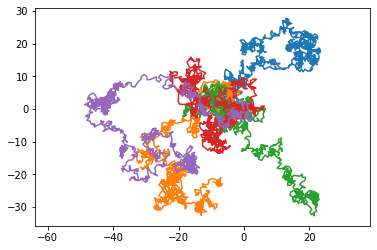

In [43]:
for j in range(5):
    z=randint(1,5000)
    plt.plot(a[z],b[z])
    plt.axis('equal')
    print(z)

## 질문 2-1  최종 위치와 원점 사이의 거리
### numerical summary, 히스토그램, 바이올린그림, 커널밀도추정량

In [44]:
pd.DataFrame(distance).describe()

,0
count,5000.000000
mean,27.852378
std,14.371059
min,0.731854
25%,17.199787
50%,26.246409
75%,36.787526
max,89.348529


(array([ 435.,  989., 1214., 1055.,  679.,  364.,  179.,   64.,   15.,
           6.]),
 array([ 0.7318545 ,  9.59352195, 18.45518941, 27.31685686, 36.17852432,
        45.04019177, 53.90185923, 62.76352668, 71.62519414, 80.48686159,
        89.34852905]),
 <a list of 10 Patch objects>)

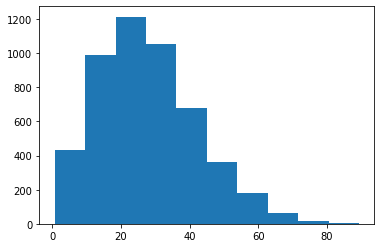

In [45]:
plt.hist(distance)

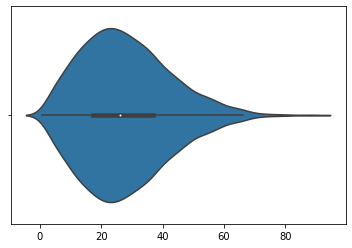

In [46]:
sns.violinplot(distance)

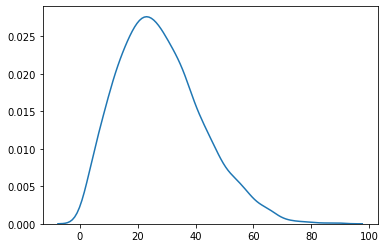

In [47]:
sns.kdeplot(distance)

## 질문 2-3 원점에서 가장 먼거리

In [48]:
max(distance)

89.34852904801522

## 질문 2-4 원점에서 가장 까까운 거리

In [49]:
min(distance)

0.7318544967343618

## 질문 2-5 원점에서 반경 40을 벗어나는 최소 시점
### numerical summary, 히스토그램, 바이올린그림, 커널밀도추정량

In [50]:
pd.DataFrame(q).T.describe()

,0
count,1701.000000
mean,672.474427
std,193.393056
min,182.000000
25%,524.000000
50%,683.000000
75%,833.000000
max,999.000000


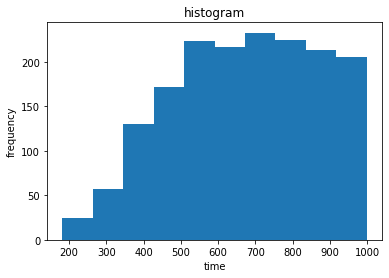

In [51]:
plt.hist(q)
plt.title("histogram")
plt.xlabel("time")
plt.ylabel("frequency")
plt.show()

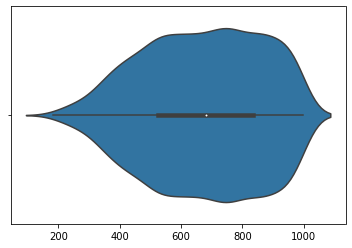

In [52]:
sns.violinplot(q)

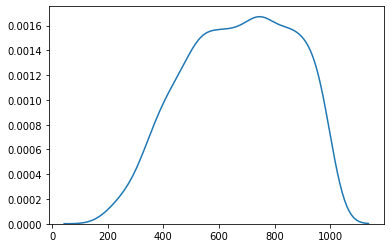

In [53]:
sns.distplot(q, hist=False, kde=True)

# 총 정리

상황1.동서남북
먼저 궤적은 매우 랜덤하게 움직이는 모습을 보여준다. 또 동서남북 방향으로만 움직일 수 있기 때문에 각진 모양이 나온다.
그리고 최종위치와 원점 사이의 거리는 27로 갔던길을 되돌아올 수 있기때문에 1000번 움직인 것을 고려해봤을때 굉장히 작은 숫자가 나온다.
시각화 그래프들은 모두 0부터 27사이의 자료가 몰려있는 것으로 보인다. 
마지막으로 거리가 40이 되는 최소 시점자료는 1712개로 나머지 자료들은 거리 40에 도달하지 못했다. 이때의 시각화 자료를 보면 평균 647이후의 값에 자료가 몰려있는 것으로 보인다. 

상황2. 모든 방향
마찬가지로 궤적은 매우 랜덤하게 움직이며 이번 상황은 지그재그 모양으로 나타난다. 최종위치와 원점 사이의 거리는 평균 27, 최소 시점의 평균은 672로 동서남북의 자료와 매우 비슷하다. 상황2의 시각화 자료도 상황 1과 매우 비슷한 양상을 보이므로 이것을 통해서 상황 1과 2가 매우 큰 반복으로 했을 때는 뚜렷한 결과의 차이가 보이지 않는다는 것을 알 수 있다.